In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates


In [61]:
data = {

    'Date': [

        '2024-10-22', '2024-10-22', '2024-10-18', '2024-10-08', '2024-06-05', '2024-05-21', 

        '2024-05-15', '2024-05-08', '2024-01-10', '2023-11-23', '2023-09-29', '2023-07-10',

        '2023-03-29', '2023-03-16', '2023-02-22', '2022-07-01',  # Placeholder for 2022
        
        '2021-06-17', '2020-11-11',

        '2019-10-21', '2019-10-17', '2019-10-14', '2019-06-15', '2019-04-25', '2019-04-18', 

        '2019-04-16', '2019-03-28', '2019-03-21', '2018-09-26', '2017-10-19'

    ],

    'Event': [

        'Spark Sessions 001: Data Science@UL-FRI  ', 'Nič več znanstvena fantastika: AI in science - BEST  ', 

        'LLM Dojo: Jan Rupnik, IJS  ', 'Okrogla miza o vplivu umetne inteligence na znanost in družbo: SMASH  ', 'Snowflake beginner course by In516ht  ', 

        'Geometric Deep Learning: Petar Veličković, DeepMind  ', 'Data Streaming with Kafka: Jure Ham and Matic Žgur, Outbrain  ', 

        'Usage of AWS in data engineering: Anžej Curk and Denis Turšič, Result  ', 'Reinforcement fundamentals: Joshua B. Evans  ',

        'Graph Deep Learning: Florian Thamm  ', 'Okrogla miza: UI - ustaviti ali pospešiti njen razvoj?  ', 'Outbrain DataScience summer school  ',

        'ŠO FRI: Sodobna umetna inteligenca  ', 'EESTEC JobFair: Svet Prihodnosti (NLP and AI Processing)  ', 'Recommender systems with TensorFlow workshop  ', 
        '',  # Placeholder for 2022

        'Introduction to state of the art NLP (BERT and GPT)  ', 

        'Gašper Beguš, Ph.D.: Kako se umetna inteligenca uči govoriti?  ', 'Umetna inteligenca in digitalni marketing – Kaj pa Watson?  ',

        'Umetna inteligenca - malo zares in malo za hec  ', 'The subtle art of recommendation (algorithms)  ', 'MEi:CogSci Conference  ',

        'Deep Machine Vision – From Research to Market ', 'AI at your fingertips with Microsoft Azure  ', 'Vid Kocijan: Ali ima umetna inteligenca zdravo pamet?  ', 'Debata KUI  ',

        'Okrogla miza "Možnosti umetne inteligence" EESTEC JobFair  ', 'Konferenca AI4GOOD - Huawei  ', 

        'FeelTheFuture sejem  '

    ]

}


In [62]:
# Create DataFrame
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date for better plotting
df = df.sort_values('Date', ascending=False)

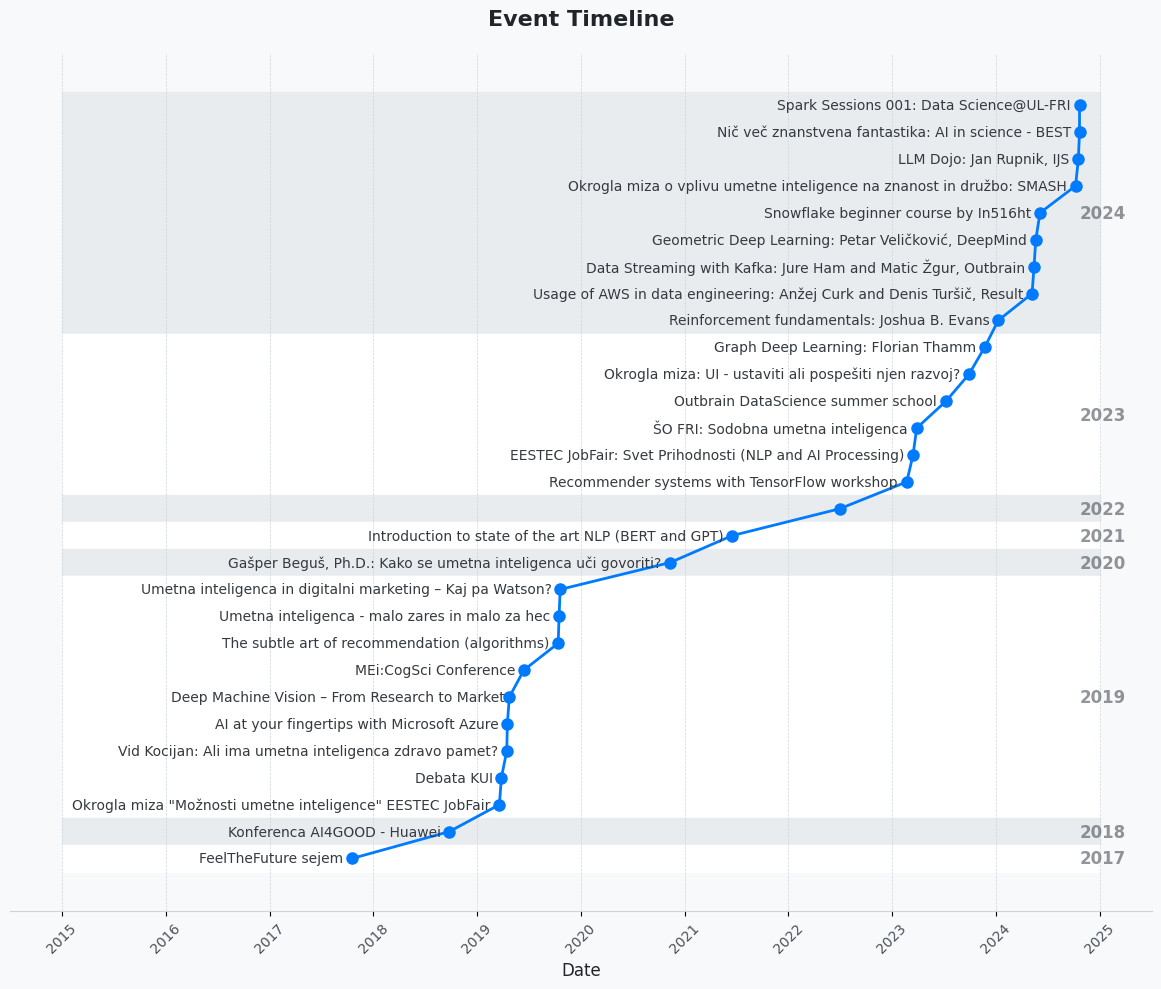

In [63]:
import matplotlib.patches as patches

# Enhance the timeline visualization with a more polished, graphic design style
plt.figure(figsize=(12, 10), facecolor='#f8f9fa')
ax = plt.gca()

start_date = pd.to_datetime('2015-01-01')
end_date = pd.to_datetime('2025-01-01') #df['Date'].max()

# Plotting the timeline
ax.plot(df['Date'], range(len(df)), marker='o', markersize=8, color='#007bff', linestyle='-', linewidth=2, zorder=2)

# Adding labels for each event
for i, (date, event) in enumerate(zip(df['Date'], df['Event'])):
    ax.text(date, i, f"{event}", fontsize=10, verticalalignment='center', horizontalalignment='right', 
            color='#343a40', fontweight='medium')

# Add background panels to distinguish years
years = df['Date'].dt.year.unique()
for i, year in enumerate(years):
    y_start = df[df['Date'].dt.year == year].index.min()
    y_end = df[df['Date'].dt.year == year].index.max()
    ax.add_patch(
        # patches.Rectangle((df['Date'].min(), y_start - 0.5), df['Date'].max() - df['Date'].min(), y_end - y_start + 1,
        #                   color='#e9ecef' if i % 2 == 0 else '#ffffff', zorder=1)
        patches.Rectangle((start_date, y_start - 0.5), end_date - start_date, y_end - y_start + 1,
                          color='#e9ecef' if i % 2 == 0 else '#ffffff', zorder=1)
    )
    ax.text(df['Date'].max(), (y_start + y_end) / 2, f"{year}", fontsize=12, color='#495057', 
            verticalalignment='center', fontweight='bold', rotation=0, alpha=0.6)

# Reverse the y-axis
plt.gca().invert_yaxis()

# Styling plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#ced4da')
ax.xaxis.label.set_color('#495057')
ax.yaxis.set_visible(False)

# Format date ticks and general style
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_facecolor('#f8f9fa')
plt.xticks(rotation=45, fontsize=10, color='#495057')
plt.title('Event Timeline', fontsize=16, color='#212529', fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12, color='#212529')
plt.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5, color='#ced4da', zorder=0)
plt.tight_layout()

# Save the plot
plt.savefig('event_timeline.png', dpi=300)

plt.show()
